In [ ]:
# all tensorflow api is accessible through this
import tensorflow as tf        
# to visualize the resutls
import matplotlib.pyplot as plt 
# 70k mnist dataset that comes with the tensorflow container
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np

In [ ]:
tf.set_random_seed(0)

# load data
mnist = input_data.read_data_sets('input/fashion_data', 
                                  source_url='http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/',
                                  one_hot=True)

In [ ]:
# From: https://medium.com/tensorist/classifying-fashion-articles-using-tensorflow-fashion-mnist-f22e8a04728a
# Our Fashion MNIST labels
# Create dictionary of target classes
label_dict = {
 0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'
}

# Take one sample

# Get 28x28 image
sample_1 = mnist.train.images[47].reshape(28,28)
# Get corresponding integer label from one-hot encoded data
sample_label_1 = np.where(mnist.train.labels[47] == 1)[0][0]
# Plot sample
print("y = {label_index} ({label})".format(label_index=sample_label_1, label=label_dict[sample_label_1]))
plt.imshow(sample_1, cmap='Greys')
plt.show()

In [ ]:
# One-Layer Softmax Regression 
# Model: Y = softmax(X∗W+b)
# Loss (Cross entropy): H(Y',Y) = −∑Y'(i)⋅log(Y(i))

# 1. Define Variables and Placeholders
# the first dimension (None) will index the images in the mini-batch
# None means dimension of any lenght - undefined number of images (vectors) of length 784
X = tf.placeholder(tf.float32, [None, 28, 28, 1])
Y_ = tf.placeholder(tf.float32, [None, 10])      # correct answers (labels)
W = tf.Variable(tf.zeros([784, 10]))             # weights W[784, 10] 784=28*28
b = tf.Variable(tf.zeros([10]))                  # biases b[10]
XX = tf.reshape(X, [-1, 784])                    # flatten the images into a single line of pixels

In [ ]:
# 2. Define the model
# matmul = matrix multiplication
Ylogits = tf.matmul(XX, W) + b
Y = tf.nn.softmax(Ylogits)

In [ ]:
# 3. Define the loss function  
# cross_entropy = tf.reduce_mean(-tf.reduce_sum(Y_ * tf.log(Y), reduction_indices=[1]))
# WARNING: This op expects unscaled logits, since it performs a softmax on logits internally for efficiency. 
# Do not call this op with the output of softmax, as it will produce incorrect results.
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y_, logits=Ylogits))

In [ ]:
# 4. Define the accuracy 
correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [ ]:
# 5. Define an optimizer - Gradient Descent Optimizer or Adam Optimizer
#train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
train_step = tf.train.AdamOptimizer(0.005).minimize(cross_entropy) 

In [ ]:
# initialize
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

In [10]:
def training_step(i, update_test_data, update_train_data):

    print "\r", i,
    ####### actual learning 
    # reading batches of 100 images with 100 labels
    batch_X, batch_Y = mnist.train.next_batch(100)
    # the backpropagation training step
    sess.run(train_step, feed_dict={XX: batch_X, Y_: batch_Y})
    
    ####### evaluating model performance for printing purposes
    # evaluation used to later visualize how well you did at a particular time in the training
    train_a = []
    train_c = []
    test_a = []
    test_c = []
    if update_train_data:
        a, c = sess.run([accuracy, cross_entropy], feed_dict={XX: batch_X, Y_: batch_Y})
        train_a.append(a)
        train_c.append(c)

    if update_test_data:
        a, c = sess.run([accuracy, cross_entropy], feed_dict={XX: mnist.test.images, Y_: mnist.test.labels})
        test_a.append(a)
        test_c.append(c)

    
    return (train_a, train_c, test_a, test_c)

In [11]:
# 6. Train and test the model, store the accuracy and loss per iteration

train_a = []
train_c = []
test_a = []
test_c = []
    
training_iter = 10000
epoch_size = 100
for i in range(training_iter):
    test = False
    if i % epoch_size == 0:
        test = True
    a, c, ta, tc = training_step(i, test, test)
    train_a += a
    train_c += c
    test_a += ta
    test_c += tc

9999                              


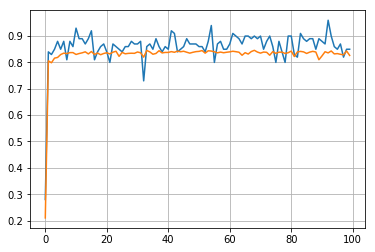

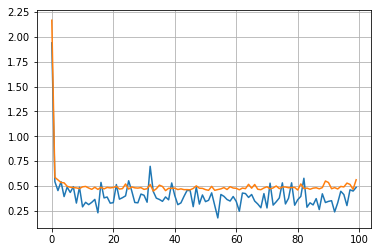

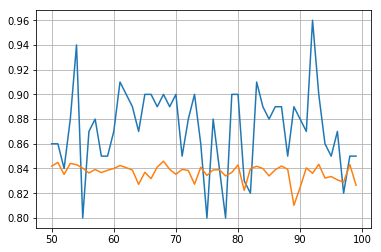

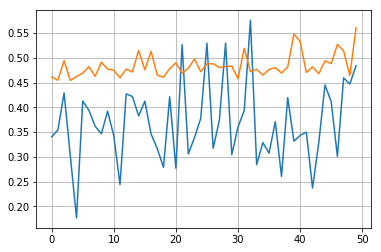

In [12]:
# 7. Plot and visualise the accuracy and loss

# accuracy training vs testing dataset
plt.plot(train_a)
plt.plot(test_a)
plt.grid(True)
plt.show()

# loss training vs testing dataset
plt.plot(train_c)
plt.plot(test_c)
plt.grid(True)
plt.show()

# Zoom in on the tail of the plots
zoom_point = 50
x_range = range(zoom_point,training_iter/epoch_size)
plt.plot(x_range, train_a[zoom_point:])
plt.plot(x_range, test_a[zoom_point:])
plt.grid(True)
plt.show()

plt.plot(train_c[zoom_point:])
plt.plot(test_c[zoom_point:])
plt.grid(True)
plt.show()

In [13]:
# Accuracy
print(sess.run(accuracy, feed_dict={XX: mnist.test.images, Y_: mnist.test.labels}))

0.8341
